In [ ]:
#Authors: Varun  Ram, Shaun Jacob, Manoshi Raha, Jenish Murdia
#Reg no: 20BAC10038, 20BAC10022, 20BAC10020, 20BAC10004

In [ ]:

from keras.layers import Dense
from keras import Input 
from keras import Model
from keras.datasets import mnist
from keras.datasets import cifar10
from keras import layers
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
encoding_dim = 25 
input_img = Input(shape=(784,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)
autoencoder = Model(input_img, decoded)
encoder = Model(input_img, encoded)
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [ ]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 784)
(10000, 784)


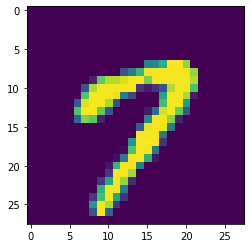

In [ ]:
plt.imshow(x_train[15].reshape(28,28))
#Took the 16th image just for reference and visualization

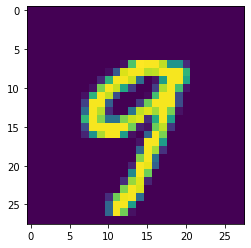

In [ ]:
plt.imshow(x_train[45].reshape(28,28))
#Took the 46th image just for reference and visualization

In [ ]:
autoencoder.fit(x_train, x_train,epochs=25,batch_size=256,validation_data=(x_test, x_test))

Epoch 1/25
235/235 [==============================] - 3s 9ms/step - loss: 0.2868 - val_loss: 0.1996
Epoch 2/25
235/235 [==============================] - 2s 8ms/step - loss: 0.1800 - val_loss: 0.1634
Epoch 3/25
235/235 [==============================] - 2s 8ms/step - loss: 0.1540 - val_loss: 0.1434
Epoch 4/25
235/235 [==============================] - 2s 9ms/step - loss: 0.1385 - val_loss: 0.1316
Epoch 5/25
235/235 [==============================] - 2s 8ms/step - loss: 0.1290 - val_loss: 0.1242
Epoch 6/25
235/235 [==============================] - 2s 8ms/step - loss: 0.1228 - val_loss: 0.1191
Epoch 7/25
235/235 [==============================] - 2s 8ms/step - loss: 0.1185 - val_loss: 0.1152
Epoch 8/25
235/235 [==============================] - 3s 12ms/step - loss: 0.1151 - val_loss: 0.1121
Epoch 9/25
235/235 [==============================] - 2s 9ms/step - loss: 0.1123 - val_loss: 0.1096
Epoch 10/25
235/235 [==============================] - 2s 9ms/step - loss: 0.1100 - val_loss: 0.107

In [ ]:
"""encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)"""

'encoded_imgs = encoder.predict(x_test)\ndecoded_imgs = decoder.predict(encoded_imgs)'

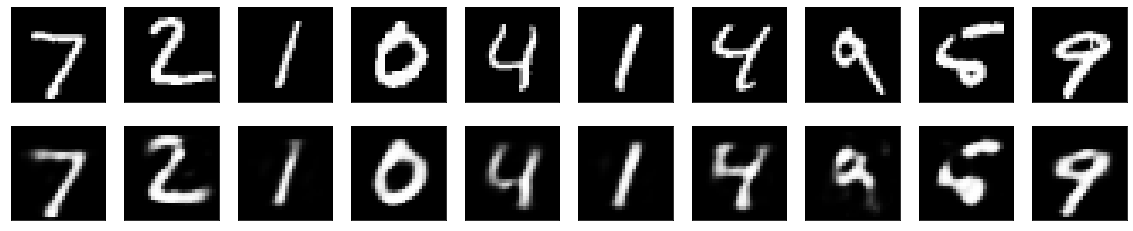

In [ ]:
encoded_img = encoder.predict(x_test)
decoded_img = decoder.predict(encoded_img)
plt.figure(figsize=(20, 4))

for i in range(10):
    
    
    ax = plt.subplot(2, 10, i + 1 + 10)
    plt.imshow(decoded_img[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)


    
    ax = plt.subplot(2, 10, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

In [ ]:
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

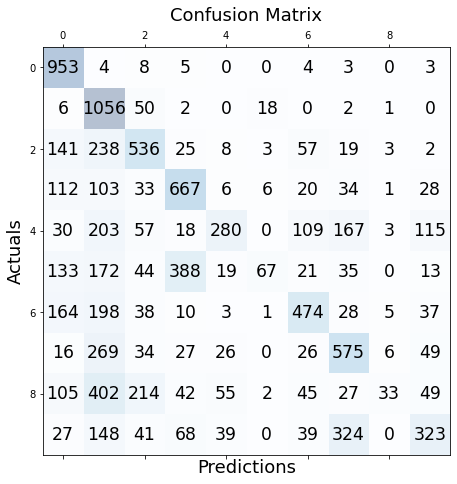

In [ ]:
pipeline = make_pipeline(StandardScaler(),RandomForestClassifier(n_estimators=10, max_features=5, max_depth=2, random_state=1))

pipeline.fit(x_train, y_train)

y_pred = pipeline.predict(x_test)

conf_matrix = metrics.confusion_matrix(y_true=y_test, y_pred=y_pred)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()